In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

data_train = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/train.csv')
data_test = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/test.csv')
potential_energy = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/potential_energy.csv')
structures = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/structures.csv')
dipole_moments = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/dipole_moments.csv')
mulliken_charges = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/mulliken_charges.csv')
magnetic_shielding_tensors = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/magnetic_shielding_tensors.csv')
scalar_coupling_contributions = pd.read_csv('/content/drive/My Drive/Kaggle/magnetic_properties_kaggle/scalar_coupling_contributions.csv')

In [3]:
atom_level = mulliken_charges.merge(magnetic_shielding_tensors)

In [47]:
atom_level

,molecule_name,atom_index,mulliken_charge,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169
1,dsgdb9nsd_000001,1,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,0.133923,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,0.133923,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
...,...,...,...,...,...,...,...,...,...,...,...,...
2358870,dsgdb9nsd_133885,11,0.078144,28.6323,-0.1148,-2.2990,1.9651,24.5294,-2.4469,-2.0840,0.8863,33.2278
2358871,dsgdb9nsd_133885,12,0.099332,31.2449,6.1929,6.3054,3.8977,29.1150,5.6072,2.3143,3.7461,29.7163
2358872,dsgdb9nsd_133885,13,0.114018,33.8789,-3.6278,0.0001,0.6389,25.2816,-0.0000,-0.0001,0.0000,22.4285
2358873,dsgdb9nsd_133885,14,0.078144,28.6324,-0.1148,2.2990,1.9652,24.5294,2.4471,2.0840,-0.8863,33.2278


In [4]:
data_train = data_train.merge(scalar_coupling_contributions)

In [107]:
data_train

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc,sd,pso,dso
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600,83.022400,0.254579,1.258620,0.272010
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,-11.034700,0.352978,2.858390,-3.433600
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,-11.032500,0.352944,2.858520,-3.433870
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,-11.031900,0.352934,2.858550,-3.433930
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400,83.022200,0.254585,1.258610,0.272013
...,...,...,...,...,...,...,...,...,...,...
4659071,4659071,dsgdb9nsd_133884,17,4,2JHC,3.543450,3.586440,0.019741,0.150477,-0.213205
4659072,4659072,dsgdb9nsd_133884,17,5,3JHC,0.568997,0.674583,-0.007276,0.305078,-0.403388
4659073,4659073,dsgdb9nsd_133884,17,6,3JHC,1.173370,1.337470,-0.028423,0.312240,-0.447920
4659074,4659074,dsgdb9nsd_133884,17,7,2JHC,4.762010,4.800620,0.139202,-0.053102,-0.124710


In [5]:
structures = structures.rename(columns={"atom_index": "atom_index_0", "x": "x1", "y": "y1", "z": "z1"})
data_train_d = data_train.merge(structures,on=['molecule_name','atom_index_0'])
data_train_d = data_train_d.rename(columns={"atom": "atom_1"})

structures = structures.rename(columns={"atom_index_0": "atom_index_1", "x1": "x2", "y1": "y2", "z1": "z2"})
data_train_d = data_train_d.merge(structures,how='left',on=['molecule_name','atom_index_1'])
data_train_d = data_train_d.rename(columns={"atom": "atom_2"})

atom_level = atom_level.rename(columns={"atom_index": "atom_index_0"})
data_train_d = data_train_d.merge(atom_level,on=['molecule_name','atom_index_0'])
data_train_d = data_train_d.rename(columns={"mulliken_charge": "mulliken_charge_1","XX": "XX_1"	,"YX":"YX_1",	"ZX":"ZX_1", "XY":"XY_1",	"YY": "YY_1",	"ZY":"ZY_1",	"XZ":"XZ_1", "YZ":"YZ_1",	"ZZ":"ZZ_1" })

atom_level = atom_level.rename(columns={"atom_index_0": "atom_index_1"})
data_train_d = data_train_d.merge(atom_level,how='left',on=['molecule_name','atom_index_1'])
data_train_d = data_train_d.rename(columns={"mulliken_charge": "mulliken_charge_2","XX": "XX_2"	,"YX":"YX_2",	"ZX":"ZX_2", "XY":"XY_2",	"YY": "YY_2",	"ZY":"ZY_2",	"XZ":"XZ_2", "YZ":"YZ_2",	"ZZ":"ZZ_2" })

atom_level = atom_level.rename(columns={"atom_index_1": "atom_index"})


In [6]:
data_train_d

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc,sd,pso,dso,atom_1,x1,y1,z1,atom_2,x2,y2,z2,mulliken_charge_1,XX_1,YX_1,ZX_1,XY_1,YY_1,ZY_1,XZ_1,YZ_1,ZZ_1,mulliken_charge_2,XX_2,YX_2,ZX_2,XY_2,YY_2,ZY_2,XZ_2,YZ_2,ZZ_2
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600,83.022400,0.254579,1.258620,0.272010,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,-11.034700,0.352978,2.858390,-3.433600,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,-11.032500,0.352944,2.858520,-3.433870,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133923,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,-11.031900,0.352934,2.858550,-3.433930,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133923,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400,83.022200,0.254585,1.258610,0.272013,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659071,dsgdb9nsd_133884,17,4,2JHC,3.543450,3.586440,0.019741,0.150477,-0.213205,H,1.126550,-1.348733,-1.933838,C,1.629865,-0.747236,0.235262,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,-0.064218,175.5091,-26.4784,0.0000,-32.8936,140.6687,0.0002,0.0012,0.0002,136.0553
4659072,4659072,dsgdb9nsd_133884,17,5,3JHC,0.568997,0.674583,-0.007276,0.305078,-0.403388,H,1.126550,-1.348733,-1.933838,C,1.415947,0.620773,0.939122,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,-0.367733,164.8638,2.7385,-0.0001,-0.5899,170.0417,0.0002,-0.0002,0.0003,143.3249
4659073,4659073,dsgdb9nsd_133884,17,6,3JHC,1.173370,1.337470,-0.028423,0.312240,-0.447920,H,1.126550,-1.348733,-1.933838,C,-0.027076,0.747033,0.478506,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,0.255121,140.8193,1.6914,-0.0002,39.5850,168.6967,-0.0006,-0.0002,-0.0006,103.1222
4659074,4659074,dsgdb9nsd_133884,17,7,2JHC,4.762010,4.800620,0.139202,-0.053102,-0.124710,H,1.126550,-1.348733,-1.933838,C,-0.131901,0.356983,-1.010196,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,0.010044,120.2304,-6.9030,9.9705,-18.4385,109.9946,-28.7188,1.5550,-9.5259,89.9291


In [6]:
### euclidian distance
import numpy as np

data_train_d['dist'] = np.linalg.norm(data_train_d.iloc[:, [11,12,13]].values - data_train_d.iloc[:, [15,16,17]], axis=1)

In [7]:
data_train_d = data_train_d.drop(columns = ["x1", "x2" , "y1","y2", "z1","z2"])

In [9]:
data_train_d

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc,sd,pso,dso,atom_1,atom_2,mulliken_charge_1,XX_1,YX_1,ZX_1,XY_1,YY_1,ZY_1,XZ_1,YZ_1,ZZ_1,mulliken_charge_2,XX_2,YX_2,ZX_2,XY_2,YY_2,ZY_2,XZ_2,YZ_2,ZZ_2,dist
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600,83.022400,0.254579,1.258620,0.272010,H,C,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,-11.034700,0.352978,2.858390,-3.433600,H,H,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,-11.032500,0.352944,2.858520,-3.433870,H,H,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133923,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,-11.031900,0.352934,2.858550,-3.433930,H,H,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133923,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,1.783157
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400,83.022200,0.254585,1.258610,0.272013,H,C,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,1.091952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659071,dsgdb9nsd_133884,17,4,2JHC,3.543450,3.586440,0.019741,0.150477,-0.213205,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,-0.064218,175.5091,-26.4784,0.0000,-32.8936,140.6687,0.0002,0.0012,0.0002,136.0553,2.306538
4659072,4659072,dsgdb9nsd_133884,17,5,3JHC,0.568997,0.674583,-0.007276,0.305078,-0.403388,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,-0.367733,164.8638,2.7385,-0.0001,-0.5899,170.0417,0.0002,-0.0002,0.0003,143.3249,3.495226
4659073,4659073,dsgdb9nsd_133884,17,6,3JHC,1.173370,1.337470,-0.028423,0.312240,-0.447920,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,0.255121,140.8193,1.6914,-0.0002,39.5850,168.6967,-0.0006,-0.0002,-0.0006,103.1222,3.397424
4659074,4659074,dsgdb9nsd_133884,17,7,2JHC,4.762010,4.800620,0.139202,-0.053102,-0.124710,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,0.010044,120.2304,-6.9030,9.9705,-18.4385,109.9946,-28.7188,1.5550,-9.5259,89.9291,2.312202


In [8]:
import numpy as np
import pandas as pd

def hot_encoding(col_name,data):
    for i in range(0,len(col_name)):
        unique= pd.unique(data[col_name[i]])
        unique = [x for x in unique if x == x]
        for j in range(0,len(unique)):
            arr = np.zeros(len(data[col_name[i]]))
            arr[np.where(unique[j] == data[col_name[i]])[0]] = 1
            df1 = pd.DataFrame(arr,columns= [unique[j]])
            data= pd.concat([data,df1], axis = 1)
        #data = data.drop(col_name[i], axis = 1)
    return data

categorical_var= ['type']

data_train_d = hot_encoding(categorical_var, data_train_d)

In [9]:
data_train_d

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,fc,sd,pso,dso,atom_1,atom_2,mulliken_charge_1,XX_1,YX_1,ZX_1,XY_1,YY_1,ZY_1,XZ_1,YZ_1,ZZ_1,mulliken_charge_2,XX_2,YX_2,ZX_2,XY_2,YY_2,ZY_2,XZ_2,YZ_2,ZZ_2,dist,1JHC,2JHH,1JHN,2JHN,2JHC,3JHH,3JHC,3JHN
0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600,83.022400,0.254579,1.258620,0.272010,H,C,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,1.091953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,-11.034700,0.352978,2.858390,-3.433600,H,H,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,1.783120,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,-11.032500,0.352944,2.858520,-3.433870,H,H,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133923,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,1.783147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,-11.031900,0.352934,2.858550,-3.433930,H,H,0.133921,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,0.133923,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,1.783157,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,dsgdb9nsd_000001,2,0,1JHC,84.807400,83.022200,0.254585,1.258610,0.272013,H,C,0.133922,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,-0.535689,195.3147,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,1.091952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659071,dsgdb9nsd_133884,17,4,2JHC,3.543450,3.586440,0.019741,0.150477,-0.213205,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,-0.064218,175.5091,-26.4784,0.0000,-32.8936,140.6687,0.0002,0.0012,0.0002,136.0553,2.306538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4659072,4659072,dsgdb9nsd_133884,17,5,3JHC,0.568997,0.674583,-0.007276,0.305078,-0.403388,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,-0.367733,164.8638,2.7385,-0.0001,-0.5899,170.0417,0.0002,-0.0002,0.0003,143.3249,3.495226,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4659073,4659073,dsgdb9nsd_133884,17,6,3JHC,1.173370,1.337470,-0.028423,0.312240,-0.447920,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,0.255121,140.8193,1.6914,-0.0002,39.5850,168.6967,-0.0006,-0.0002,-0.0006,103.1222,3.397424,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4659074,4659074,dsgdb9nsd_133884,17,7,2JHC,4.762010,4.800620,0.139202,-0.053102,-0.124710,H,C,0.090746,30.1753,-6.4689,-5.5474,-3.8417,30.4761,6.3612,-1.5380,4.0582,29.4963,0.010044,120.2304,-6.9030,9.9705,-18.4385,109.9946,-28.7188,1.5550,-9.5259,89.9291,2.312202,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
mol_l = np.unique(atom_level['molecule_name'])
atom_features = ['mulliken_charge',	'XX',	'YX',	'ZX',	'XY',	'YY',	'ZY',	'XZ',	'YZ',	'ZZ']
pair_features = ['fc',	'sd',	'pso', 'dso','dist','1JHC',	'2JHH',	'1JHN',	'2JHN',	'2JHC',	'3JHH',	'3JHC',	'3JHN']
pair_indx = ['atom_index_0',	'atom_index_1']
atom_in_pair_features_1 = ['mulliken_charge_1','XX_1', 'YX_1', 'ZX_1', 'XY_1', 'YY_1',	'ZY_1',	'XZ_1',	'YZ_1',	'ZZ_1']
atom_in_pair_features_2 = ['mulliken_charge_2','XX_2', 'YX_2', 'ZX_2', 'XY_2', 'YY_2',	'ZY_2',	'XZ_2',	'YZ_2',	'ZZ_2']

In [10]:
import tensorflow as tf

### Weave Net

def Weave_module(df_a, df_p, mol_l, atom_features, pair_features, pair_indx, atom_in_pair_features_1, atom_in_pair_features_2):

  ### Performing invariant preserving operations
  layer = tf.keras.layers.ReLU()
  
  #(A--->A) 
  A_k_1 = layer(df_a[atom_features].iloc[:,:].values)

  #(P--->P)
  #P_k_1 = layer(df_p[pair_features].iloc[:,:].values)
  P_k_1 = df_p[pair_features].iloc[:,:].values
  print('done P-->P')

  #(P--->A)

  #temp1 = df_p.groupby(['molecule_name','atom_index_0'])[pair_features].sum().reset_index()
  #temp2 = df_p.groupby(['molecule_name','atom_index_1'])[pair_features].sum().reset_index()
  #temp1 = temp1.rename(columns={"atom_index_0": "atom_index_1"})

  #temp_merged =pd.merge_ordered(temp1,temp2,left_by=['molecule_name'])
  #A_k_2 = temp_merged.groupby(['molecule_name','atom_index_1'])[pair_features].sum()

  #(A--->P)

  t1 = df_p[atom_in_pair_features_1]
  t2 = df_p[atom_in_pair_features_2]
  print('done N1')
  tot_1 = np.hstack([t1.to_numpy() , t2.to_numpy()])
  tot_2 = np.hstack([t2.to_numpy() , t2.to_numpy()])
  print('done N2')
  P_k_2 = np.sum((tot_1, tot_2), axis = 0)
  print('done N3')
  #A_k = np.hstack([A_k_1, A_k_2])
  P_k = np.hstack([P_k_1, P_k_2])

  return P_k#, A_k


In [38]:
P_k = Weave_module(atom_level, data_train_d, mol_l, atom_features, pair_features, pair_indx, atom_in_pair_features_1, atom_in_pair_features_2)

done P-->P
done N1
done N2
done N3


In [13]:
P_k.shape

(4659076, 33)

In [39]:
###from Weave module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(P_k,data_train_d["scalar_coupling_constant"], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)

(3727260, 25)


In [12]:
#### Weave module and traininf for just one type
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

mol_l = np.unique(atom_level['molecule_name'])
atom_features = ['mulliken_charge',	'XX',	'YX',	'ZX',	'XY',	'YY',	'ZY',	'XZ',	'YZ',	'ZZ']
pair_features = ['fc',	'sd',	'pso', 'dso','dist']
pair_indx = ['atom_index_0',	'atom_index_1']
atom_in_pair_features_1 = ['mulliken_charge_1','XX_1', 'YX_1', 'ZX_1', 'XY_1', 'YY_1',	'ZY_1',	'XZ_1',	'YZ_1',	'ZZ_1']
atom_in_pair_features_2 = ['mulliken_charge_2','XX_2', 'YX_2', 'ZX_2', 'XY_2', 'YY_2',	'ZY_2',	'XZ_2',	'YZ_2',	'ZZ_2']

type_df  = data_train_d.loc[(data_train_d['type'] == '1JHC')]
P_k_type = Weave_module(atom_level, type_df, mol_l, atom_features, pair_features, pair_indx, atom_in_pair_features_1, atom_in_pair_features_2)

X_train, X_test, y_train, y_test = train_test_split(P_k_type,type_df["scalar_coupling_constant"], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape)

done P-->P
done N1
done N2
done N3
(567306, 25)


In [42]:
### No Weave module used

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_no_weave, X_test_no_weave, y_train_no_weave, y_test_no_weave = train_test_split(data_train_d[pair_features],data_train_d["scalar_coupling_constant"], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled_no_weave = scaler.fit_transform(X_train_no_weave)
X_test_scaled_no_weave = scaler.transform(X_test_no_weave)

print(X_train_no_weave.shape)

(3727260, 5)


In [40]:
import tensorflow as tf
#tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),#tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(264, activation='relu'),tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(264, activation='relu'),#tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
#    tf.keras.layers.Dense(256, activation='relu'),
#    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.mse,
        #tf.keras.metrics.Precision(name='precision'),
        #tf.keras.metrics.Recall(name='recall')
    ]
)
err = []
epoch = 5
history = model.fit(X_train_scaled, y_train, epochs=epoch, batch_size = 100, validation_split=0.2)
prediction = model.predict(X_test_scaled)
err.append(np.sum(np.abs(np.array(prediction).flatten() - np.array(y_test)))/len(y_test))
print(err)
print(np.sum(100*np.abs(np.array(prediction).flatten()-y_test)/y_test)/ len(y_test))

Epoch 1/5
29819/29819 [==============================] - 140s 5ms/step - loss: 4.0948 - mean_squared_error: 4.0948 - val_loss: 2.8978 - val_mean_squared_error: 2.8978
Epoch 2/5
29819/29819 [==============================] - 128s 4ms/step - loss: 0.7157 - mean_squared_error: 0.7157 - val_loss: 0.4283 - val_mean_squared_error: 0.4283
Epoch 3/5
29819/29819 [==============================] - 136s 5ms/step - loss: 0.4611 - mean_squared_error: 0.4611 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 4/5
29819/29819 [==============================] - 136s 5ms/step - loss: 0.3659 - mean_squared_error: 0.3659 - val_loss: 0.4882 - val_mean_squared_error: 0.4882
Epoch 5/5
29819/29819 [==============================] - 136s 5ms/step - loss: 0.2971 - mean_squared_error: 0.2971 - val_loss: 2.9839 - val_mean_squared_error: 2.9839
[1.0520841316737666]
17.108163720698215


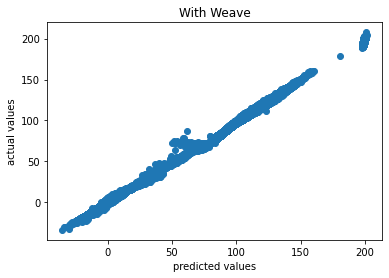

In [48]:
import matplotlib.pyplot as plt
plt.scatter(prediction,y_test)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('With Weave')
plt.show()

In [45]:
### no weave
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),#tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(264, activation='relu'),tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(264, activation='relu'),#tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
#    tf.keras.layers.Dense(256, activation='relu'),
#    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.mse,
        #tf.keras.metrics.Precision(name='precision'),
        #tf.keras.metrics.Recall(name='recall')
    ]
)

err_no_weave = []
epoch = 5
history = model.fit(X_train_scaled_no_weave, y_train_no_weave, epochs=epoch, batch_size = 100, validation_split=0.2)
prediction_no_weave = model.predict(X_test_scaled_no_weave)
err_no_weave.append(np.sum(np.abs(np.array(prediction_no_weave).flatten() - np.array(y_test_no_weave)))/len(y_test_no_weave))
print(err_no_weave)
print(np.sum(100*np.abs(np.array(prediction_no_weave).flatten()-y_test_no_weave)/y_test_no_weave)/ len(y_test_no_weave))

Epoch 1/5
29819/29819 [==============================] - 129s 4ms/step - loss: 3.3835 - mean_squared_error: 3.3835 - val_loss: 0.4905 - val_mean_squared_error: 0.4905
Epoch 2/5
29819/29819 [==============================] - 137s 5ms/step - loss: 0.5696 - mean_squared_error: 0.5696 - val_loss: 1.1520 - val_mean_squared_error: 1.1520
Epoch 3/5
29819/29819 [==============================] - 127s 4ms/step - loss: 0.3826 - mean_squared_error: 0.3826 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 4/5
29819/29819 [==============================] - 135s 5ms/step - loss: 0.3028 - mean_squared_error: 0.3028 - val_loss: 0.8350 - val_mean_squared_error: 0.8350
Epoch 5/5
29819/29819 [==============================] - 135s 5ms/step - loss: 0.2567 - mean_squared_error: 0.2567 - val_loss: 3.4432 - val_mean_squared_error: 3.4432
[1.212683109314243]
36.63563656805938


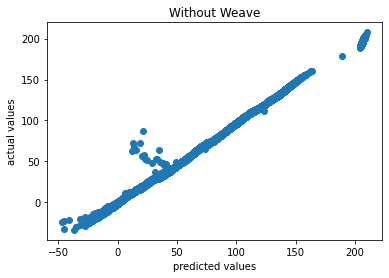

In [49]:
import matplotlib.pyplot as plt
plt.scatter(prediction_no_weave,y_test_no_weave)
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Without Weave')
plt.show()